In [15]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [22]:
df = pd.read_csv("german_credit_data.csv.xls")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [23]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [24]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [25]:
df.shape

(1000, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [28]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df["Job"].unique()

array([2, 1, 3, 0])

In [31]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.dropna().reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [35]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [39]:
df.drop(columns = 'Unnamed: 0' ,  inplace = True)

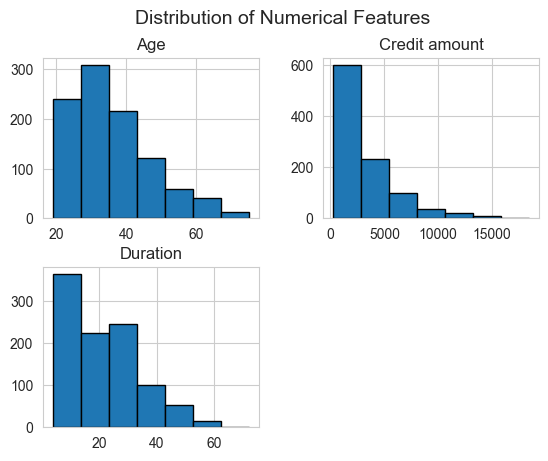

In [45]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 7, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 14)
plt.show()

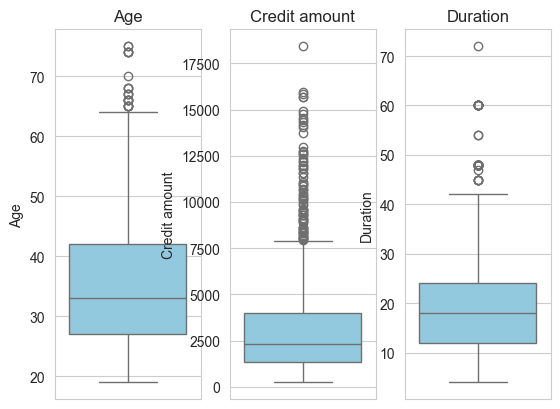

In [49]:
plt.Figure(figsize= (10,5))
for i, col in enumerate (["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y = df[col], color = 'skyblue')
    plt.title(col)

plt.tight_layout
plt.show()

In [53]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,NaN,10144,60,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,NaN,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
672,42,male,3,own,little,NaN,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


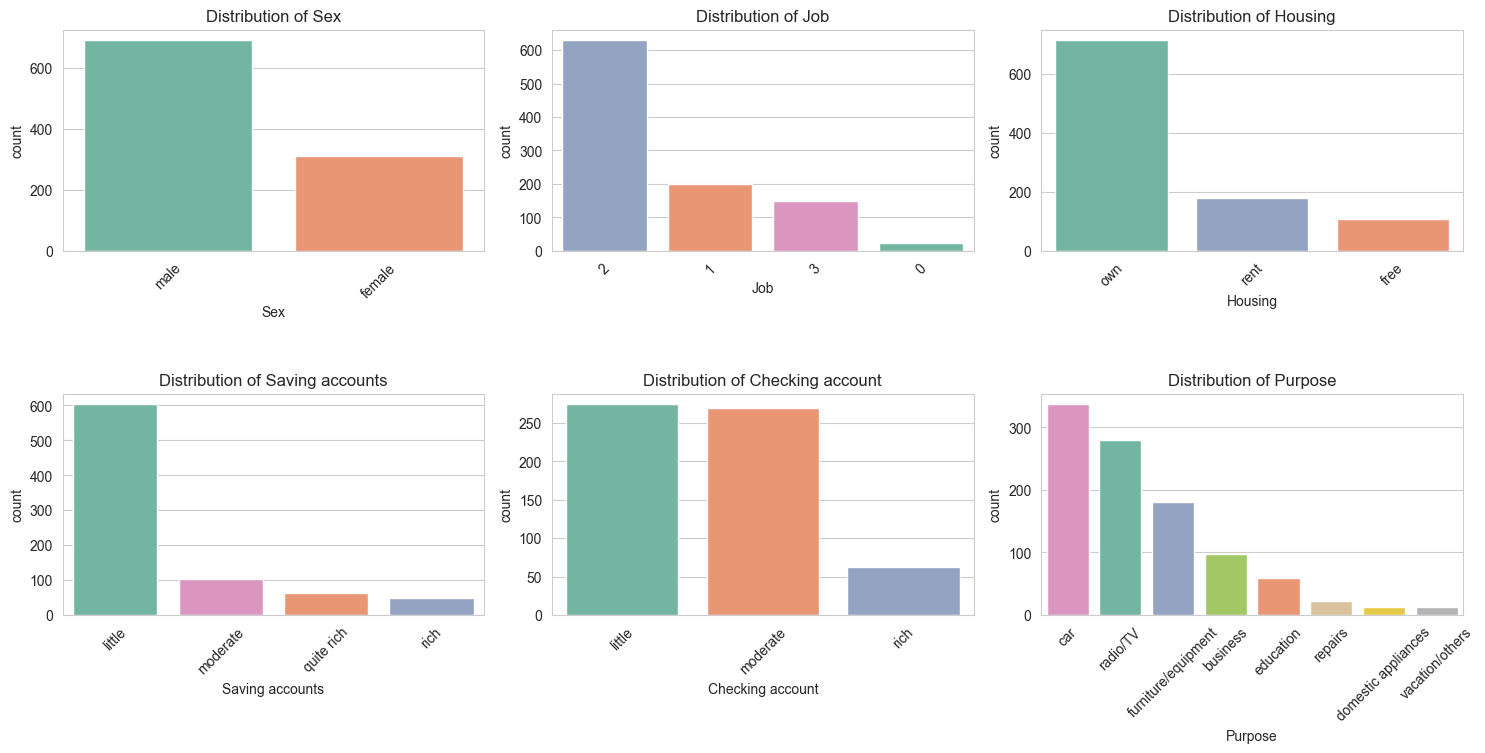

In [67]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue=col, palette="Set2", 
                  order=df[col].value_counts().index, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [68]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [69]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


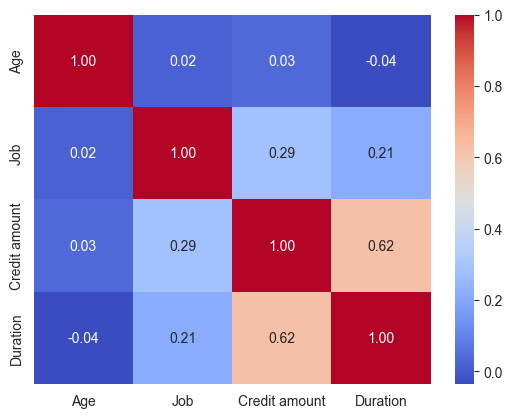

In [70]:
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= ".2f")
plt.show()

In [71]:
df.groupby("Job")["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [72]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [73]:
pd.pivot_table(df, values= "Credit amount", index = "Housing", columns= "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


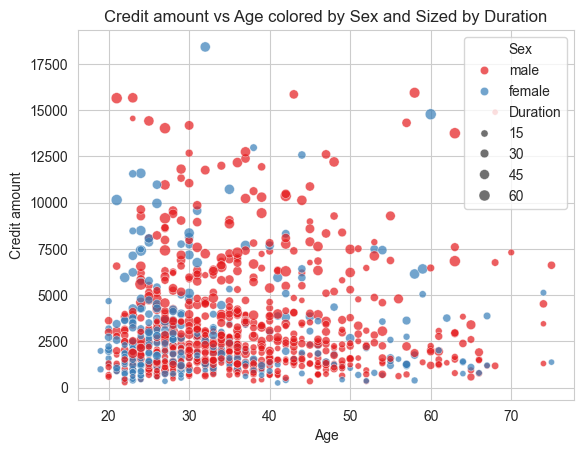

In [76]:
sns.scatterplot(data = df, x= "Age", y="Credit amount", hue = "Sex", size = "Duration", alpha= 0.7, palette= "Set1")
plt.title("Credit amount vs Age colored by Sex and Sized by Duration")
plt.show()

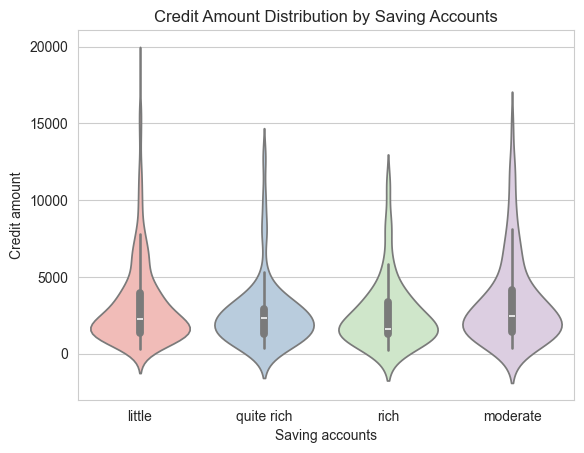

In [82]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", hue="Saving accounts", palette="Pastel1", legend=False)
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [83]:
df["Risk"].value_counts(normalize= True) * 100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

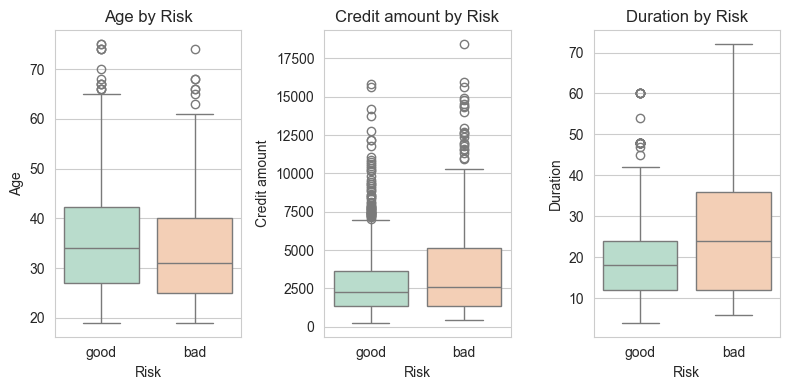

In [91]:
plt.figure(figsize=(8, 4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="Risk", y=col, hue="Risk", palette="Pastel2", legend=False)
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [92]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [93]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

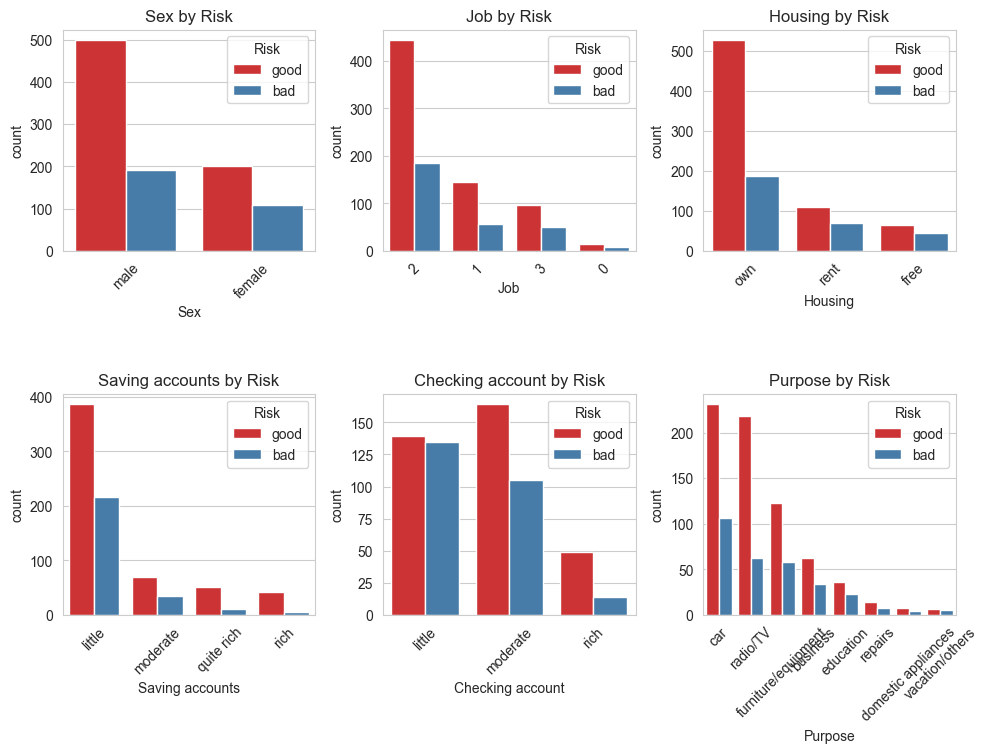

In [97]:
plt.figure(figsize = (10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = df, x= col, hue= "Risk", palette= "Set1", order= df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()